In [ ]:
import csv
import pandas as pd
import math
import numpy as np
from scipy import stats
# Use svg backend for better quality
import matplotlib
# AUTOLAB_IGNORE_START
matplotlib.use("svg")
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
# AUTOLAB_IGNORE_START
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen
# AUTOLAB_IGNORE_STOP

In [18]:
df = pd.read_csv("table.csv")
df = df.drop(['Hrs Per Week 5', 'Hrs Per Week 8'], axis=1)
df = df[pd.notnull(df['Num'])]
temp = []
for item in df["Num"]:
    temp.append(item.replace("-",""))
df["Num"] = temp
df = df[df.Num.apply(lambda x: x.isnumeric())]
df["Num"] = df["Num"].astype("int64")
df = df[df["Possible Respondents"] > 10]
df = df[df["Response Rate %"] > 20]

print(df.dtypes)
print(df.head())
print(df.isnull().any())
# print(df.loc[:, df.isna().any()])
print(df.shape)

Year                                                     int64
Semester                                                object
Dept                                                    object
Num                                                      int64
Section                                                 object
Name                                                    object
Course Name                                             object
Level                                                   object
Possible Respondents                                     int64
Num Respondents                                          int64
Response Rate %                                        float64
Hrs Per Week                                           float64
Interest in student learning                           float64
Clearly explain course requirements                    float64
Clear learning objectives & goals                      float64
Instructor provides feedback to students to improve    

In [ ]:
def plot_against_overall(category, df, dept=None, course_level=None, overall_category="Overall course rate"):
    """
    Inputs: category (string), category of interest in the dataframe
            df (pandas.dataframe), dataframe
            dept (string), major department
            course_level (int), 100,200,300... level of difficulty
            overall_category (string), overall course rate or overall teaching rate
    
    Output: matplotlib graph of category vs overall
            returns nothing
    """
    given = []
    overall = []
    if dept != None:
        df = df[df["Dept"]==dept]
    if course_level != None:
        level = course_level//100
        for item in df['Num']:
            if not str(type(item)) == "<class 'numpy.int64'>":
                print(str(type(item)))
        df = df[(df['Num']//100)%10 == level]
    for i,row in df.iterrows():
        item = row[category]
        total = row[overall_category]
        if pd.notnull(item) and pd.notnull(total):
            given.append(item)
            overall.append(total)
    x = given
    y = overall
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print("slope:", slope)
    print("intercept:", intercept)
    print("r_value:", r_value)
    print("p_value:", p_value)
    print("std_error:", std_err)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=slope*x1+intercept
    plt.plot(x,y,'ob')
    plt.plot(x1,y1,'-r')
    return 
    
p = plot_against_overall("Interest in student learning", df, None, 100)
plt.show()

## Comparing Categories Against Overall Satisfaction

slope: 1.02415043842
intercept: -0.332878129072
r_value: 0.838977271386
p_value: 0.0
std_error: 0.00450231697244


0.83897727138646128

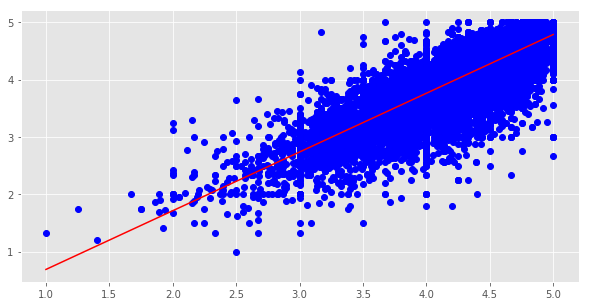

In [83]:
plot_against_overall(category = 'Interest in student learning', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.887237146452
intercept: 0.405734935161
r_value: 0.842295436396
p_value: 0.0
std_error: 0.00384828982929


0.84229543639627114

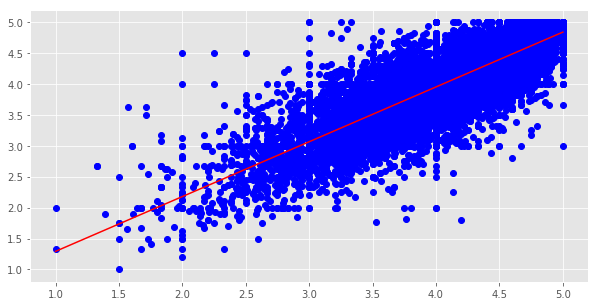

In [31]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.887237146452
intercept: 0.405734935161
r_value: 0.842295436396
p_value: 0.0
std_error: 0.00384828982929


0.84229543639627114

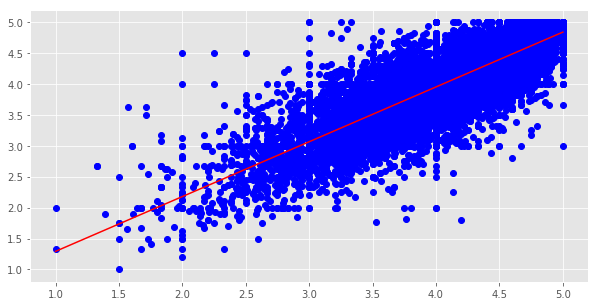

In [32]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.962528125178
intercept: 0.0581044198429
r_value: 0.874883170899
p_value: 0.0
std_error: 0.00361159523687


0.87488317089907364

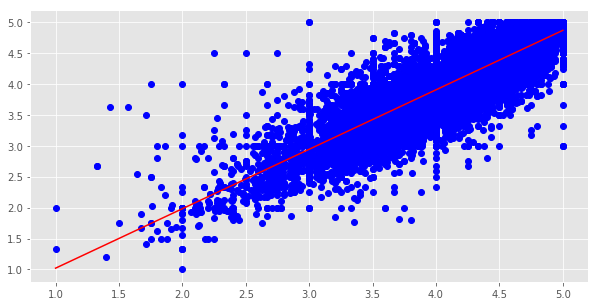

In [33]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.962528125178
intercept: 0.0581044198429
r_value: 0.874883170899
p_value: 0.0
std_error: 0.00361159523687


0.87488317089907364

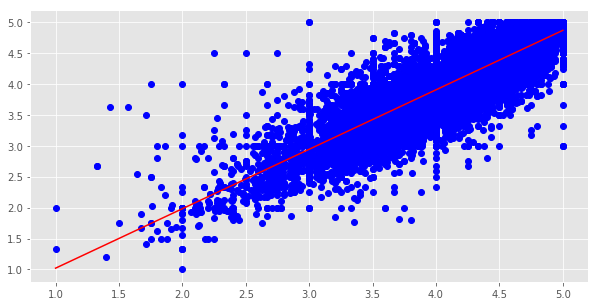

In [34]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.822232647217
intercept: 0.773080624027
r_value: 0.83474576281
p_value: 0.0
std_error: 0.00367616907798


0.8347457628097531

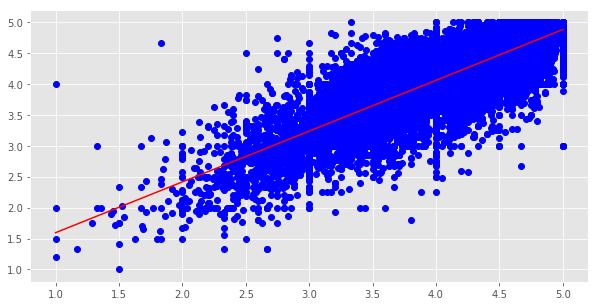

In [35]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 1.05631367319
intercept: -0.431116446599
r_value: 0.872509191619
p_value: 0.0
std_error: 0.00400926758539


0.87250919161874452

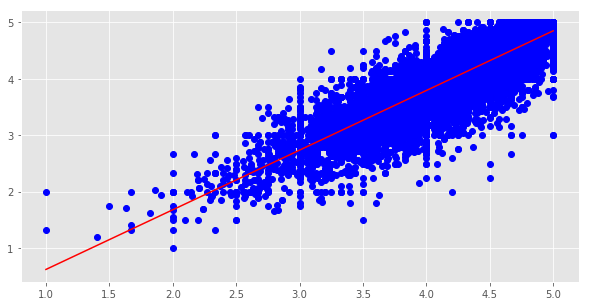

In [36]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.949555970103
intercept: 0.110961368973
r_value: 0.898340449022
p_value: 0.0
std_error: 0.00314725182308


0.89834044902163257

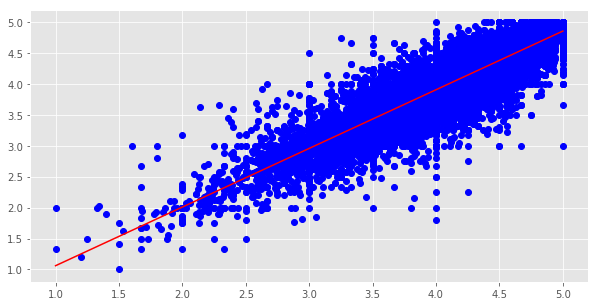

In [37]:
plot_against_overall(category = 'Explains subject matter of course', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.922599668521
intercept: -0.0181018650327
r_value: 0.709477298997
p_value: 0.0
std_error: 0.00621136758694


0.7094772989973025

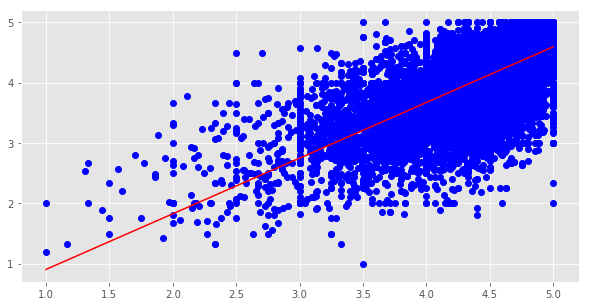

In [38]:
plot_against_overall(category = 'Show respect for all students', df = df, dept=None, course_level=None, overall_category="Overall course rate")

The category with the weakest correlation to overall course rate is 'show respect for all students'

slope: 1.07739437371
intercept: -0.490140050783
r_value: 0.889108910571
p_value: 0.0
std_error: 0.00375921595477


0.88910891057149832

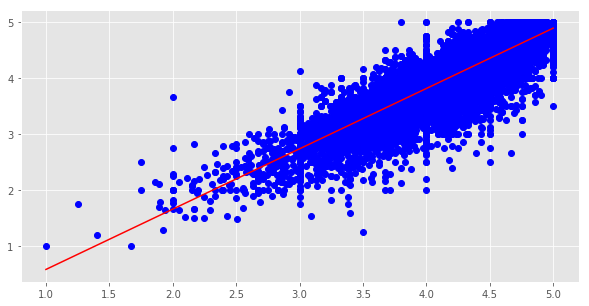

In [39]:
plot_against_overall(category = 'Interest in student learning', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.904126918654
intercept: 0.410181753367
r_value: 0.864659290178
p_value: 0.0
std_error: 0.00356040226498


0.86465929017776044

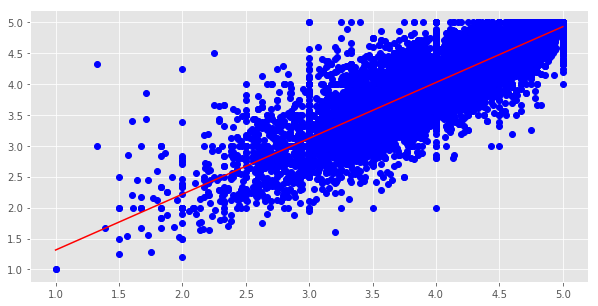

In [40]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.904126918654
intercept: 0.410181753367
r_value: 0.864659290178
p_value: 0.0
std_error: 0.00356040226498


0.86465929017776044

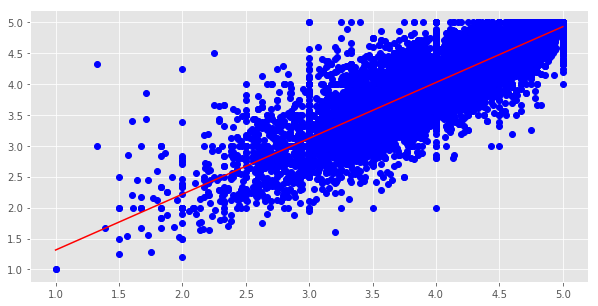

In [41]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.976816581783
intercept: 0.0730773085044
r_value: 0.894417784308
p_value: 0.0
std_error: 0.0033105989695


0.89441778430834296

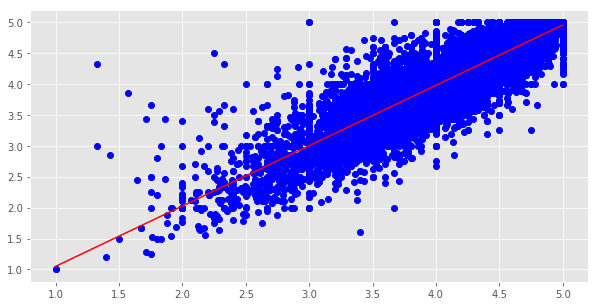

In [42]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.852072266711
intercept: 0.726293889148
r_value: 0.871412557059
p_value: 0.0
std_error: 0.00325115277053


0.87141255705908738

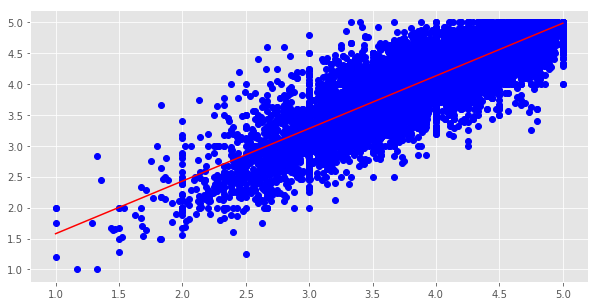

In [43]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 1.06467384706
intercept: -0.391674260899
r_value: 0.885901632035
p_value: 0.0
std_error: 0.0037786009556


0.88590163203458339

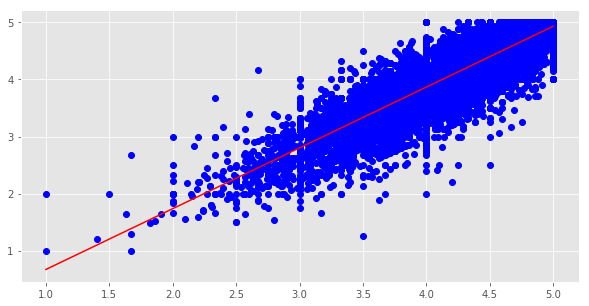

In [44]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.98353195544
intercept: 0.0422034315417
r_value: 0.937349043846
p_value: 0.0
std_error: 0.00247773943876


0.93734904384568141

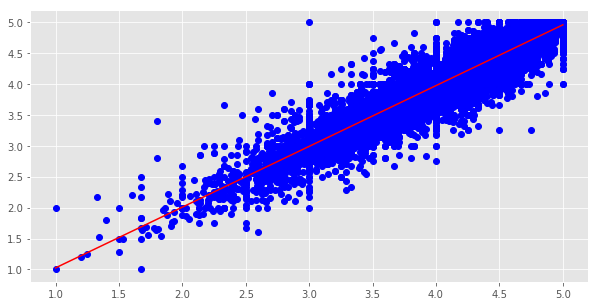

In [45]:
plot_against_overall(category = 'Explains subject matter of course', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.99609131655
intercept: -0.274363988576
r_value: 0.771468571888
p_value: 0.0
std_error: 0.00556828325885


0.77146857188783258

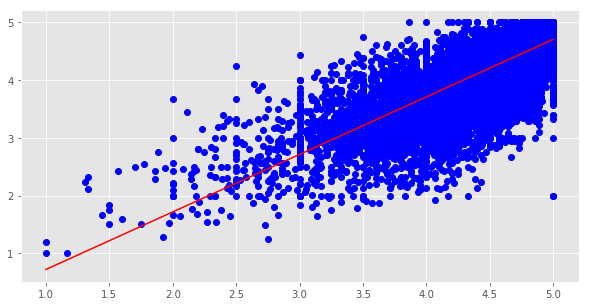

In [46]:
plot_against_overall(category = 'Show respect for all students', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

Once again, shows respect for students is the weakest correlated. 

## By Department

In [47]:
all_departments = list(set(df['Dept']))
len(all_departments)

60

There are 60 unique departments at CMU. We're interested in knowing for which departments are FCE scores the highest and lowest. 

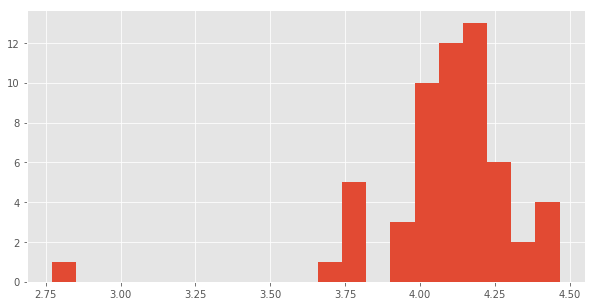

In [75]:
course_rate_by_dept = []
depts = []
for dept in all_departments:
    subset = df[df['Dept'] == dept]
    if subset.shape[0] < 5: 
        continue
    avg_course_rate = subset['Overall course rate'].mean()
    course_rate_by_dept.append(avg_course_rate)
    depts.append(dept)
course_rate_by_dept = np.array(course_rate_by_dept)
plt.hist(course_rate_by_dept, bins='auto')
plt.show()

In [76]:
lowest = np.array(depts)[course_rate_by_dept <= np.percentile(course_rate_by_dept, 10)]
lowest

array(['CRM', 'ECO', 'MCS', 'IS', 'CIT', 'WC'], 
      dtype='<U3')

3.756934404283805


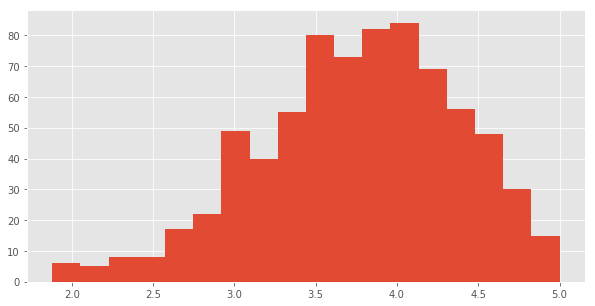

In [81]:
lowest_df = df[df['Dept'].isin(lowest)]
print(lowest_df['Overall course rate'].mean())
plt.hist(lowest_df['Overall course rate'], bins='auto')
plt.show()

3.8864524765729636


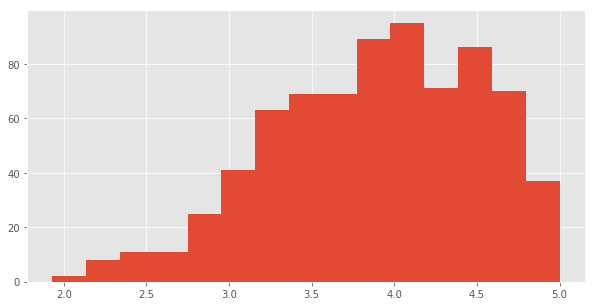

In [98]:
print(lowest_df['Overall teaching rate'].mean())
plt.hist(lowest_df['Overall teaching rate'], bins='auto')
plt.show()

In [77]:
highest = np.array(depts)[course_rate_by_dept >= np.percentile(course_rate_by_dept, 90)]
highest #all graduate departments!

array(['ICT', 'ML', 'ETC', 'HIS', 'ISR', 'IA'], 
      dtype='<U3')

4.393021978021984


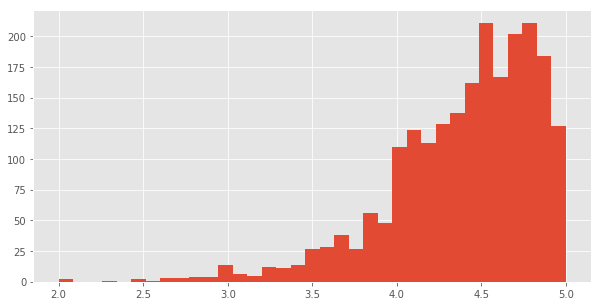

In [82]:
highest_df = df[df['Dept'].isin(highest)]
print(highest_df['Overall course rate'].mean())
plt.hist(highest_df['Overall course rate'], bins='auto')
plt.show()

4.47341117216117


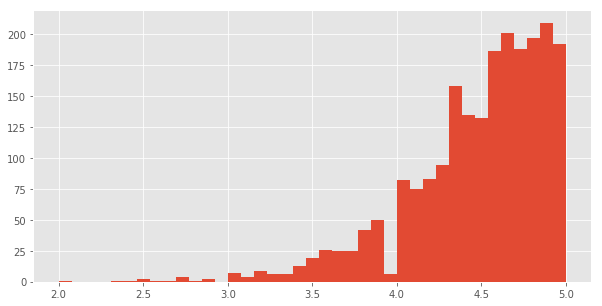

In [99]:
highest_df = df[df['Dept'].isin(highest)]
print(highest_df['Overall teaching rate'].mean())
plt.hist(highest_df['Overall teaching rate'], bins='auto')
plt.show()

slope: 0.894047591968
intercept: 0.104837473183
r_value: 0.830536935422
p_value: 1.28397475759e-167
std_error: 0.0234983824835


0.83053693542213214

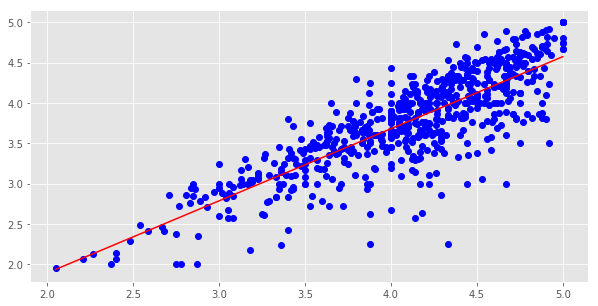

In [84]:
plot_against_overall(category = 'Interest in student learning', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.940379503672
intercept: 0.0303229806571
r_value: 0.86302042695
p_value: 3.13353066869e-195
std_error: 0.0215738819372


0.8630204269499927

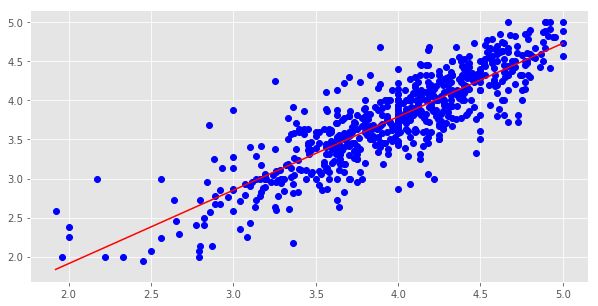

In [85]:
plot_against_overall(category = 'Clearly explain course requirements', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.988611149695
intercept: -0.17097962439
r_value: 0.893985205168
p_value: 3.85790349466e-229
std_error: 0.01942120659


0.89398520516791846

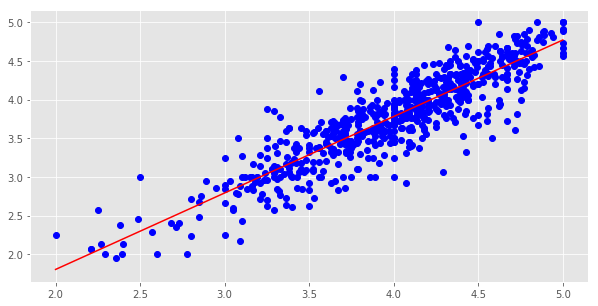

In [86]:
plot_against_overall(category = 'Clear learning objectives & goals', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.837861569408
intercept: 0.596719200492
r_value: 0.85114477361
p_value: 2.24534271893e-184
std_error: 0.0202525902546


0.85114477360988139

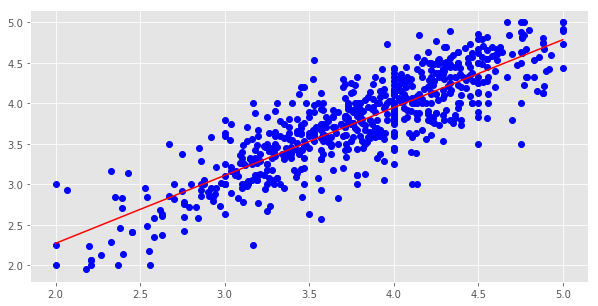

In [87]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.982918786838
intercept: -0.204332787407
r_value: 0.884187360828
p_value: 2.25791515035e-217
std_error: 0.0203527389167


0.88418736082759664

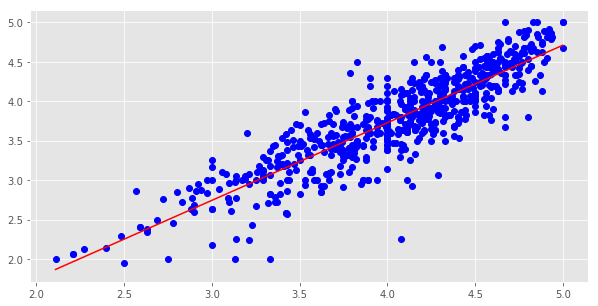

In [88]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.963915217136
intercept: -0.0312944893751
r_value: 0.911246237857
p_value: 5.47737897301e-253
std_error: 0.0170751411033


0.91124623785717418

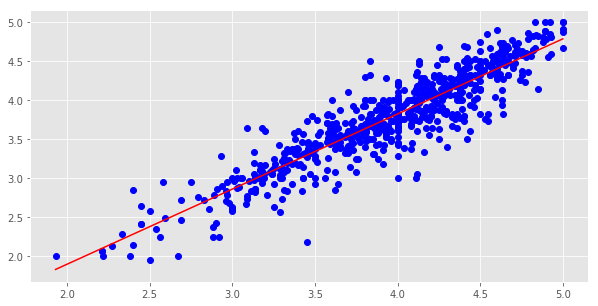

In [89]:
plot_against_overall(category = 'Explains subject matter of course', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.917959765102
intercept: -0.213646642215
r_value: 0.7436011419
p_value: 6.55146620137e-116
std_error: 0.0323500323701


0.74360114189999438

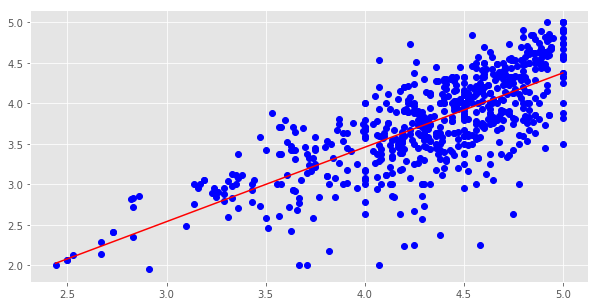

In [90]:
plot_against_overall(category = 'Show respect for all students', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 1.02434924743
intercept: -0.277471867991
r_value: 0.800807537232
p_value: 0.0
std_error: 0.0175067533028


0.80080753723161224

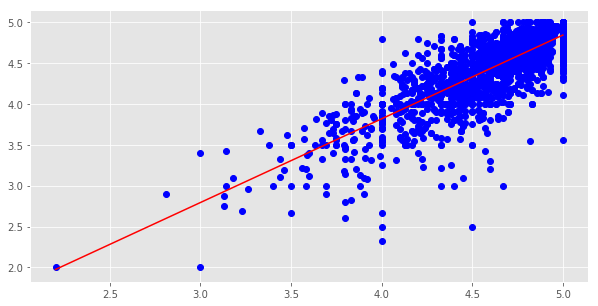

In [91]:
plot_against_overall(category = 'Interest in student learning', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.769523536417
intercept: 1.01765338197
r_value: 0.806041832136
p_value: 0.0
std_error: 0.0129121295913


0.80604183213563085

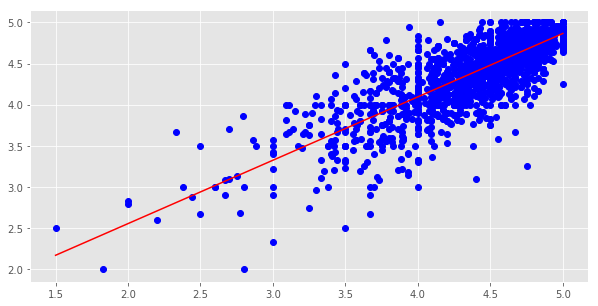

In [92]:
plot_against_overall(category = 'Clearly explain course requirements', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.897703024097
intercept: 0.421177963553
r_value: 0.853658401352
p_value: 0.0
std_error: 0.0125159243549


0.85365840135205606

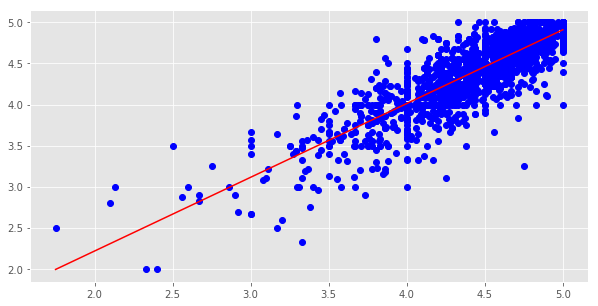

In [93]:
plot_against_overall(category = 'Clear learning objectives & goals', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.773965672142
intercept: 1.03167784901
r_value: 0.810908454661
p_value: 0.0
std_error: 0.0127629122959


0.81090845466096839

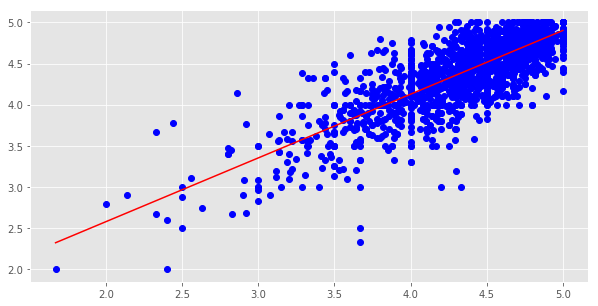

In [94]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 1.0280557538
intercept: -0.23675649395
r_value: 0.824100815421
p_value: 0.0
std_error: 0.0161476105649


0.82410081542149061

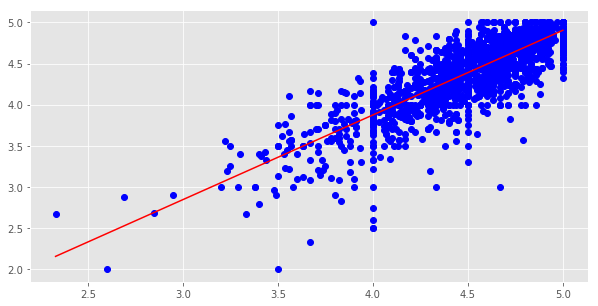

In [95]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.972295729371
intercept: 0.0497164703056
r_value: 0.875899537117
p_value: 0.0
std_error: 0.0122391478468


0.87589953711715118

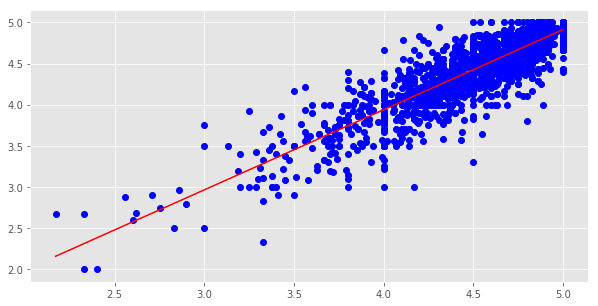

In [96]:
plot_against_overall(category = 'Explains subject matter of course', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.933963015265
intercept: 0.0505532233552
r_value: 0.665312678633
p_value: 2.30037166753e-245
std_error: 0.0239489796156


0.66531267863252097

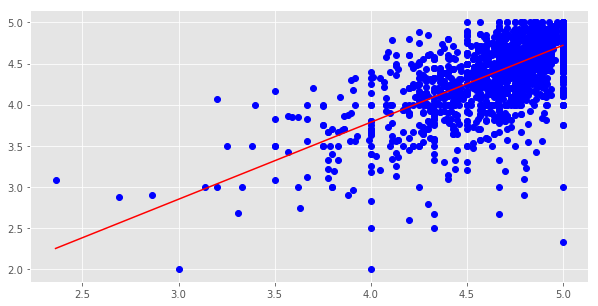

In [97]:
plot_against_overall(category = 'Show respect for all students', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

## Adjustment by Levels (RIP Aviicii)

In [114]:
lvl100 = df[list(map(lambda x: str(x)[-3] == '1', df['Num']))]
lvl200 = df[list(map(lambda x: str(x)[-3] == '2', df['Num']))]
lvl300 = df[list(map(lambda x: str(x)[-3] == '3', df['Num']))]
lvl400 = df[list(map(lambda x: str(x)[-3] == '4', df['Num']))]
lvl500 = df[list(map(lambda x: str(x)[-3] == '5', df['Num']))]
lvl600 = df[list(map(lambda x: str(x)[-3] == '6', df['Num']))]
lvl700 = df[list(map(lambda x: str(x)[-3] == '7', df['Num']))]
lvl800 = df[list(map(lambda x: str(x)[-3] == '8', df['Num']))]
lvl900 = df[list(map(lambda x: str(x)[-3] == '9', df['Num']))]

4.113427230046943


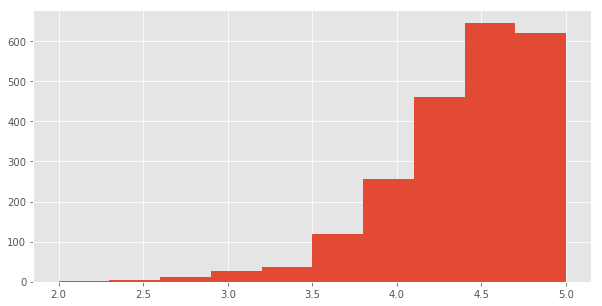

In [120]:
print(lvl100['Overall course rate'].mean())
plt.hist(highest_df['Overall course rate'], bins=10)
plt.show()

4.082226890756287


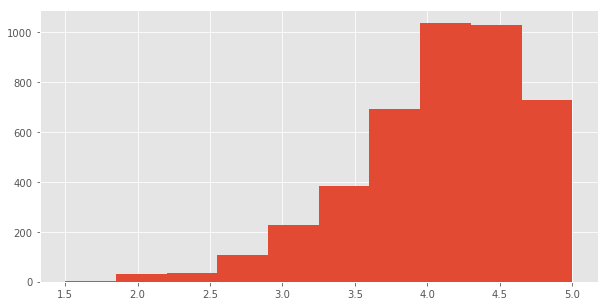

In [122]:
print(lvl200['Overall course rate'].mean())
plt.hist(lvl200['Overall course rate'][~np.isnan(lvl200['Overall course rate'])], bins = 10)
plt.show()

4.101535422702111


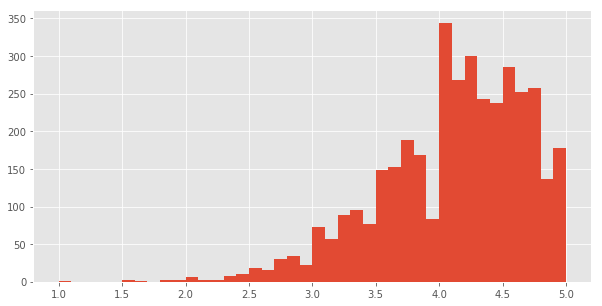

In [123]:
print(lvl300['Overall course rate'].mean())
plt.hist(lvl300['Overall course rate'][~np.isnan(lvl300['Overall course rate'])], bins='auto')
plt.show()

4.052660256410254


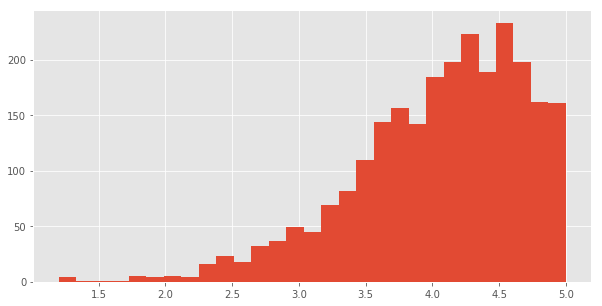

In [124]:
print(lvl400['Overall course rate'].mean())
plt.hist(lvl400['Overall course rate'][~np.isnan(lvl400['Overall course rate'])], bins='auto')
plt.show()

4.203267326732676


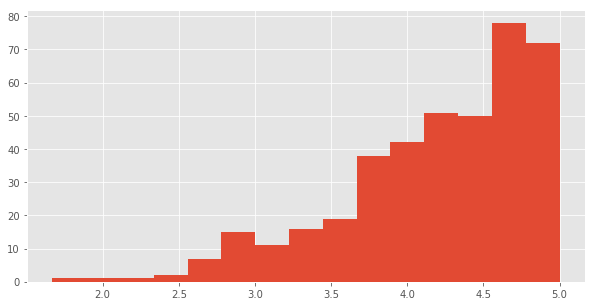

In [125]:
print(lvl500['Overall course rate'].mean())
plt.hist(lvl500['Overall course rate'][~np.isnan(lvl500['Overall course rate'])], bins='auto')
plt.show()

4.156700986700993


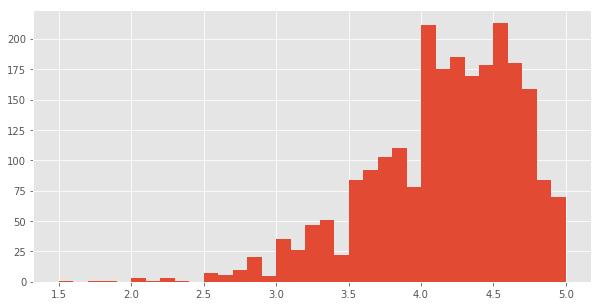

In [126]:
print(lvl600['Overall course rate'].mean())
plt.hist(lvl600['Overall course rate'][~np.isnan(lvl600['Overall course rate'])], bins='auto')
plt.show()

4.176415753903505


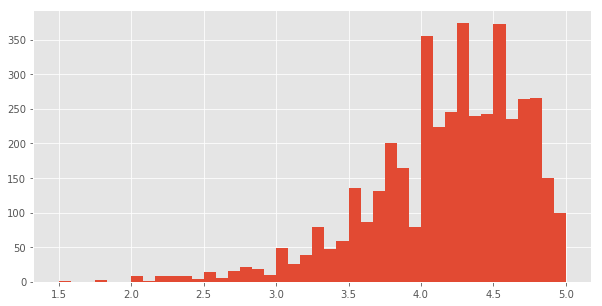

In [127]:
print(lvl700['Overall course rate'].mean())
plt.hist(lvl700['Overall course rate'][~np.isnan(lvl700['Overall course rate'])], bins='auto')
plt.show()

4.2081107099879755


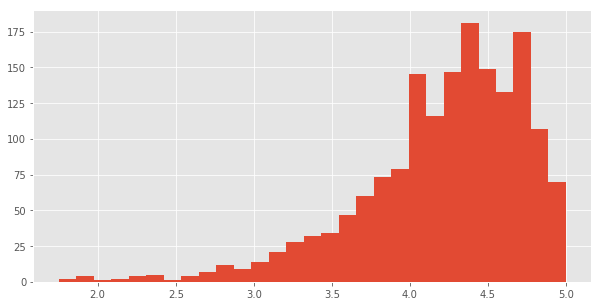

In [128]:
print(lvl800['Overall course rate'].mean())
plt.hist(lvl800['Overall course rate'][~np.isnan(lvl800['Overall course rate'])], bins='auto')
plt.show()

4.358501872659177


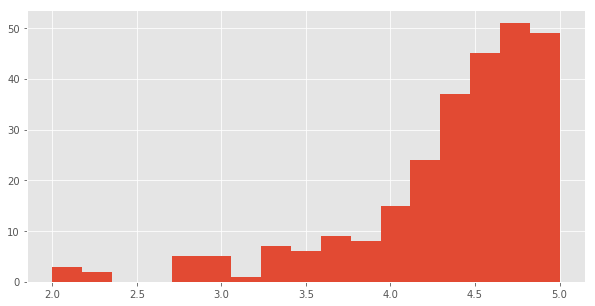

In [129]:
print(lvl900['Overall course rate'].mean())
plt.hist(lvl900['Overall course rate'][~np.isnan(lvl900['Overall course rate'])], bins='auto')
plt.show()

In [134]:
levels = np.array(list(range(100, 1000, 100)))
course_rate_values = np.array([lvl100['Overall course rate'].mean(), lvl200['Overall course rate'].mean(), lvl300['Overall course rate'].mean(), lvl400['Overall course rate'].mean(), lvl500['Overall course rate'].mean(), lvl600['Overall course rate'].mean(), lvl700['Overall course rate'].mean(), lvl800['Overall course rate'].mean(), lvl900['Overall course rate'].mean()])
teaching_rate_values = np.array([lvl100['Overall teaching rate'].mean(), lvl200['Overall teaching rate'].mean(), lvl300['Overall teaching rate'].mean(), lvl400['Overall teaching rate'].mean(), lvl500['Overall teaching rate'].mean(), lvl600['Overall teaching rate'].mean(), lvl700['Overall teaching rate'].mean(), lvl800['Overall teaching rate'].mean(), lvl900['Overall teaching rate'].mean()])

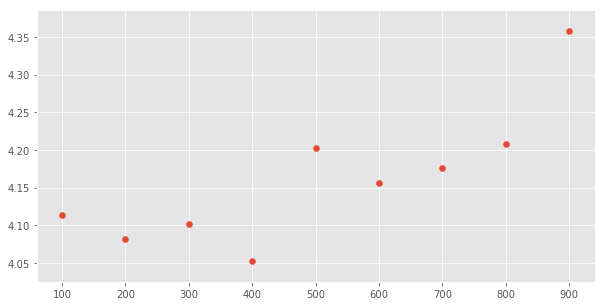

In [133]:
plt.scatter(levels, course_rate_values)
plt.show()

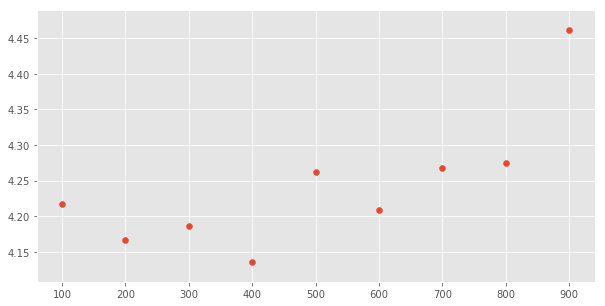

In [135]:
plt.scatter(levels, teaching_rate_values)
plt.show()